In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
import json

from collections import Counter
import re

In [26]:
train , val , test = None, None, None

In [27]:
with open(r'/kaggle/input/contract-nli-dataset/train.json') as f:
    train = json.load(f)
    
with open(r'/kaggle/input/contract-nli-dataset/test.json') as f:
    test = json.load(f)
    
with open(r'/kaggle/input/contract-nli-dataset/dev.json') as f:
    val = json.load(f)

In [28]:
assert train != None and val!= None and test != None

In [29]:
print(f"Attributes of dataset:- {list(train.keys())}")

Attributes of dataset:- ['documents', 'labels']


### EDA on labels

In [30]:
print(f"The number of labels in train:- {len(train['labels'])}")
print(f"The number of labels in val:- {len(val['labels'])}")
print(f"The number of labels in test:- {len(test['labels'])}")

The number of labels in train:- 17
The number of labels in val:- 17
The number of labels in test:- 17


In [31]:
train_df = pd.DataFrame.from_dict(train['labels'], orient='index')

train_df.style.set_properties(**{'text-align': 'left'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
)

,short_description,hypothesis
nda-11,No reverse engineering,Receiving Party shall not reverse engineer any objects which embody Disclosing Party's Confidential Information.
nda-16,Return of confidential information,Receiving Party shall destroy or return some Confidential Information upon the termination of Agreement.
nda-15,No licensing,Agreement shall not grant Receiving Party any right to Confidential Information.
nda-10,Confidentiality of Agreement,Receiving Party shall not disclose the fact that Agreement was agreed or negotiated.
nda-2,None-inclusion of non-technical information,Confidential Information shall only include technical information.
nda-1,Explicit identification,All Confidential Information shall be expressly identified by the Disclosing Party.
nda-19,Survival of obligations,Some obligations of Agreement may survive termination of Agreement.
nda-12,Permissible development of similar information,Receiving Party may independently develop information similar to Confidential Information.
nda-20,Permissible post-agreement possession,Receiving Party may retain some Confidential Information even after the return or destruction of Confidential Information.
nda-3,Inclusion of verbally conveyed information,Confidential Information may include verbally conveyed information.


In [32]:
val_df = pd.DataFrame.from_dict(val['labels'], orient='index')

val_df.style.set_properties(**{'text-align': 'left'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
)

,short_description,hypothesis
nda-11,No reverse engineering,Receiving Party shall not reverse engineer any objects which embody Disclosing Party's Confidential Information.
nda-16,Return of confidential information,Receiving Party shall destroy or return some Confidential Information upon the termination of Agreement.
nda-15,No licensing,Agreement shall not grant Receiving Party any right to Confidential Information.
nda-10,Confidentiality of Agreement,Receiving Party shall not disclose the fact that Agreement was agreed or negotiated.
nda-2,None-inclusion of non-technical information,Confidential Information shall only include technical information.
nda-1,Explicit identification,All Confidential Information shall be expressly identified by the Disclosing Party.
nda-19,Survival of obligations,Some obligations of Agreement may survive termination of Agreement.
nda-12,Permissible development of similar information,Receiving Party may independently develop information similar to Confidential Information.
nda-20,Permissible post-agreement possession,Receiving Party may retain some Confidential Information even after the return or destruction of Confidential Information.
nda-3,Inclusion of verbally conveyed information,Confidential Information may include verbally conveyed information.


In [33]:
test_df = pd.DataFrame.from_dict(test['labels'], orient='index')

test_df.style.set_properties(**{'text-align': 'left'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
)

,short_description,hypothesis
nda-11,No reverse engineering,Receiving Party shall not reverse engineer any objects which embody Disclosing Party's Confidential Information.
nda-16,Return of confidential information,Receiving Party shall destroy or return some Confidential Information upon the termination of Agreement.
nda-15,No licensing,Agreement shall not grant Receiving Party any right to Confidential Information.
nda-10,Confidentiality of Agreement,Receiving Party shall not disclose the fact that Agreement was agreed or negotiated.
nda-2,None-inclusion of non-technical information,Confidential Information shall only include technical information.
nda-1,Explicit identification,All Confidential Information shall be expressly identified by the Disclosing Party.
nda-19,Survival of obligations,Some obligations of Agreement may survive termination of Agreement.
nda-12,Permissible development of similar information,Receiving Party may independently develop information similar to Confidential Information.
nda-20,Permissible post-agreement possession,Receiving Party may retain some Confidential Information even after the return or destruction of Confidential Information.
nda-3,Inclusion of verbally conveyed information,Confidential Information may include verbally conveyed information.


## EDA on documents

In [34]:
type(train['documents'])

list

In [35]:
train_doc_size = len(train['documents'])
val_doc_size = len(val['documents'])
test_doc_size = len(test['documents'])

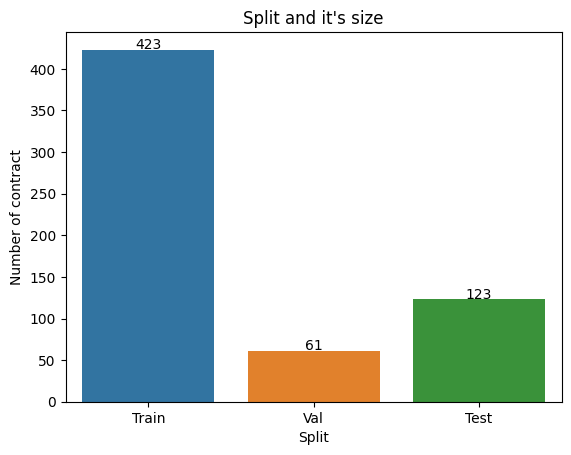

In [36]:
data = {'Split': ['Train', 'Val', 'Test'],
        'Number of contract': [train_doc_size, val_doc_size, test_doc_size]}

df = pd.DataFrame(data)

sns.barplot(x="Split", y="Number of contract", data=df)

for index, row in df.iterrows():
    plt.text(x=index, y=row['Number of contract'] + 1, s=row['Number of contract'], ha='center')

plt.title(f"Split and it's size")
plt.show()

### EDA of Train Data

In [37]:
train_doc_df = pd.DataFrame(train['documents'])

In [38]:
train_doc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               423 non-null    int64 
 1   file_name        423 non-null    object
 2   text             423 non-null    object
 3   spans            423 non-null    object
 4   annotation_sets  423 non-null    object
 5   document_type    423 non-null    object
 6   url              423 non-null    object
dtypes: int64(1), object(6)
memory usage: 23.3+ KB


In [39]:
print(f"Null Count:- \n{train_doc_df.isnull().sum()}")

Null Count:- 
id                 0
file_name          0
text               0
spans              0
annotation_sets    0
document_type      0
url                0
dtype: int64


In [40]:
def word_count(text):
    words = re.findall(r'\w+', text.lower())
    return len(words), Counter(words)

In [41]:
train_doc_df['word_count'], train_doc_df['word_frequency'] = zip(*train_doc_df['text'].apply(word_count))
print(train_doc_df['word_count'].describe().T)

count     423.000000
mean     1697.815603
std      1048.382407
min       214.000000
25%       949.500000
50%      1522.000000
75%      2109.500000
max      8674.000000
Name: word_count, dtype: float64


In [42]:
all_words = Counter()
train_doc_df['word_frequency'].apply(lambda x: all_words.update(x))
print(all_words.most_common(20))

[('the', 46587), ('of', 30026), ('or', 27264), ('to', 24413), ('and', 21256), ('any', 14737), ('party', 13523), ('in', 13033), ('information', 12686), ('agreement', 11418), ('this', 9748), ('by', 9638), ('a', 9236), ('shall', 8376), ('confidential', 8328), ('be', 8051), ('other', 7109), ('that', 7008), ('such', 6325), ('as', 5865)]


In [43]:
train_doc_df['text_length'] = train_doc_df['text'].apply(len)
print(f"Average text length: {train_doc_df['text_length'].mean()}")

Average text length: 11049.286052009456


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


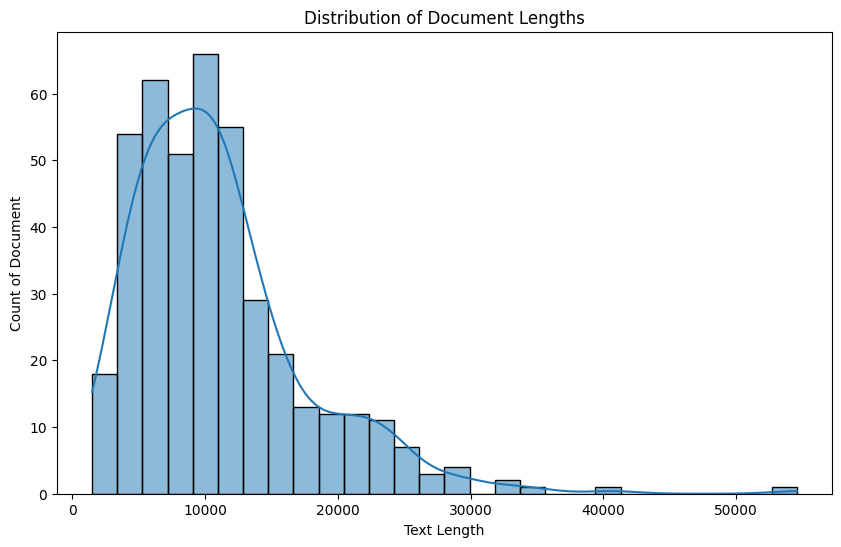

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(train_doc_df['text_length'], kde=True)
plt.title('Distribution of Document Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count of Document')
plt.show()

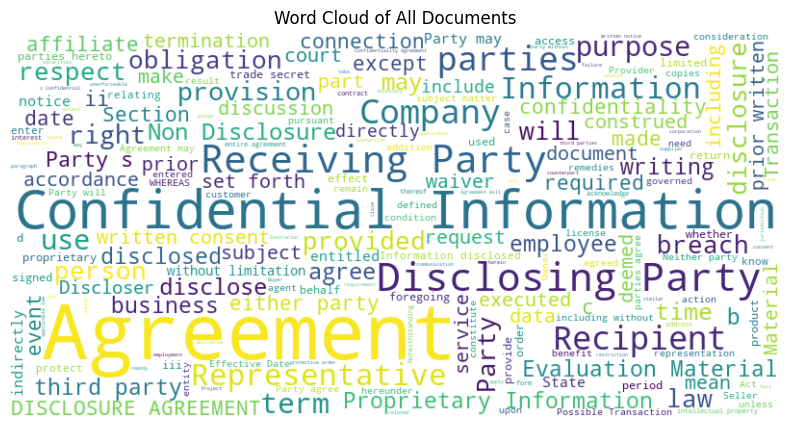

In [45]:
from wordcloud import WordCloud

all_text = ' '.join(train_doc_df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Documents')
plt.show()

In [46]:
train_doc_df['file_extension'] = train_doc_df['file_name'].apply(lambda x: x.split('.')[-1])
print(train_doc_df['file_extension'].value_counts())

file_extension
pdf    261
txt     83
htm     79
Name: count, dtype: int64


In [47]:
def span_length(spans):
    return [span[1] - span[0] for span in spans]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


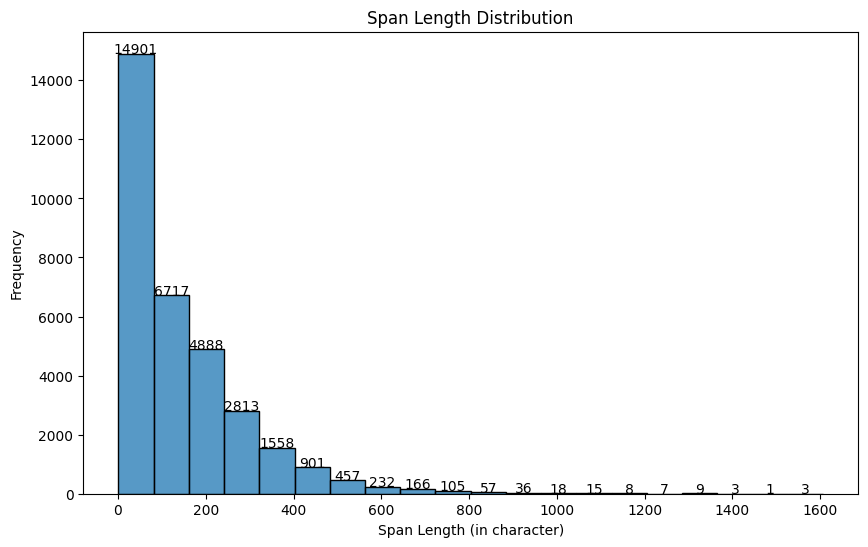

In [48]:
train_doc_df['span_lengths'] = train_doc_df['spans'].apply(span_length)
all_span_lengths = [length for sublist in train_doc_df['span_lengths'] for length in sublist]


plt.figure(figsize=(10, 6))
ax = sns.histplot(all_span_lengths, bins=20)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        ax.text(p.get_x() + p.get_width() / 2, height + 0.5, int(height), 
                ha="center", fontsize=10)

plt.title('Span Length Distribution')
plt.xlabel('Span Length (in character)')
plt.ylabel('Frequency')

plt.show()

In [49]:
train_doc_df['span_count'] = train_doc_df['spans'].apply(len)
train_doc_df['span_count'].describe()

count    423.000000
mean      77.765957
std       41.774837
min       18.000000
25%       49.500000
50%       71.000000
75%       97.000000
max      354.000000
Name: span_count, dtype: float64

In [50]:
train_doc_df['annotation_sets'][0]

[{'annotations': {'nda-11': {'choice': 'NotMentioned', 'spans': []},
   'nda-16': {'choice': 'Entailment', 'spans': [39, 40]},
   'nda-15': {'choice': 'Entailment', 'spans': [38]},
   'nda-10': {'choice': 'Entailment', 'spans': [51]},
   'nda-2': {'choice': 'NotMentioned', 'spans': []},
   'nda-1': {'choice': 'Entailment', 'spans': [14]},
   'nda-19': {'choice': 'Entailment', 'spans': [45]},
   'nda-12': {'choice': 'Entailment', 'spans': [30, 34]},
   'nda-20': {'choice': 'NotMentioned', 'spans': []},
   'nda-3': {'choice': 'Entailment', 'spans': [14]},
   'nda-18': {'choice': 'NotMentioned', 'spans': []},
   'nda-7': {'choice': 'Entailment', 'spans': [20, 23]},
   'nda-17': {'choice': 'Entailment', 'spans': [36]},
   'nda-8': {'choice': 'Entailment', 'spans': [28]},
   'nda-13': {'choice': 'Entailment', 'spans': [30, 31]},
   'nda-5': {'choice': 'Entailment', 'spans': [20, 23, 25]},
   'nda-4': {'choice': 'Entailment', 'spans': [19]}}}]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


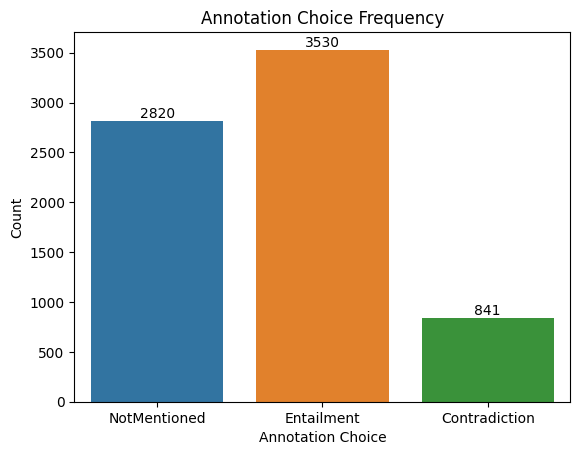

In [51]:
annotation_choices = []

for annotation_set in train_doc_df['annotation_sets']:
    for annotation_dict in annotation_set:
        for annotation, data in annotation_dict['annotations'].items():
            annotation_choices.append(data['choice'])

choice_counts = Counter(annotation_choices)

ax = sns.barplot(x=list(choice_counts.keys()), y=list(choice_counts.values()))
plt.title('Annotation Choice Frequency')
plt.xlabel('Annotation Choice')
plt.ylabel('Count')

for i, count in enumerate(choice_counts.values()):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()


In [52]:
train_doc_df['annotation_count'] = train_doc_df['annotation_sets'].apply(lambda x: len(x[0]['annotations']))
train_doc_df['annotation_count'].describe()

count    423.0
mean      17.0
std        0.0
min       17.0
25%       17.0
50%       17.0
75%       17.0
max       17.0
Name: annotation_count, dtype: float64

In [53]:
print("Unique document types:", train_doc_df['document_type'].nunique())
print("Unique URLs:", train_doc_df['url'].nunique())

Unique document types: 3
Unique URLs: 421


In [85]:
train_doc_df['document_type'].unique().tolist()

['search-pdf', 'sec-text', 'sec-html']

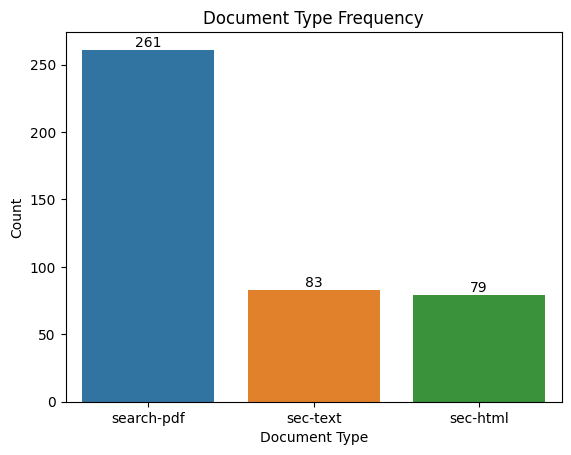

In [54]:
document_type_counts = train_doc_df['document_type'].value_counts()

ax = sns.barplot(x=document_type_counts.index, y=document_type_counts.values)
plt.title('Document Type Frequency')
plt.xlabel('Document Type')
plt.ylabel('Count')

for i, count in enumerate(document_type_counts.values):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()


### EDA of Val Data

In [55]:
val_doc_df = pd.DataFrame(val['documents'])

In [56]:
val_doc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               61 non-null     int64 
 1   file_name        61 non-null     object
 2   text             61 non-null     object
 3   spans            61 non-null     object
 4   annotation_sets  61 non-null     object
 5   document_type    61 non-null     object
 6   url              61 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.5+ KB


In [57]:
print(f"Null Count:- \n{val_doc_df.isnull().sum()}")

Null Count:- 
id                 0
file_name          0
text               0
spans              0
annotation_sets    0
document_type      0
url                0
dtype: int64


In [58]:
val_doc_df['word_count'], val_doc_df['word_frequency'] = zip(*val_doc_df['text'].apply(word_count))
print(val_doc_df['word_count'].describe().T)

count      61.000000
mean     1849.754098
std      1030.910320
min       346.000000
25%      1072.000000
50%      1743.000000
75%      2292.000000
max      4870.000000
Name: word_count, dtype: float64


In [59]:
all_words = Counter()
val_doc_df['word_frequency'].apply(lambda x: all_words.update(x))
print(all_words.most_common(20))


[('the', 7466), ('of', 4689), ('or', 4218), ('to', 3933), ('and', 3511), ('any', 2357), ('party', 2270), ('in', 2067), ('information', 1952), ('agreement', 1667), ('this', 1546), ('by', 1532), ('a', 1399), ('be', 1350), ('confidential', 1340), ('shall', 1339), ('that', 1124), ('other', 1109), ('such', 937), ('as', 897)]


In [60]:
val_doc_df['text_length'] = val_doc_df['text'].apply(len)
print(f"Average text length: {val_doc_df['text_length'].mean()}")

Average text length: 12094.967213114754


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


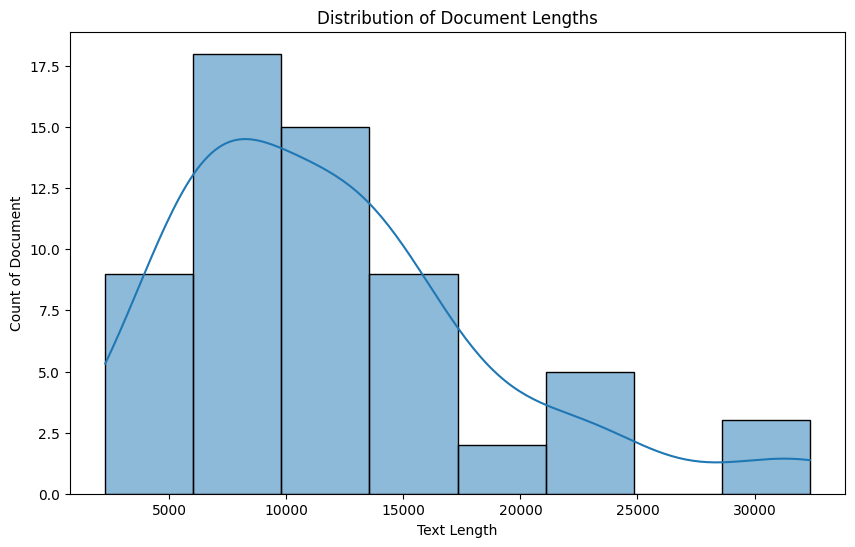

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(val_doc_df['text_length'], kde=True)
plt.title('Distribution of Document Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count of Document')
plt.show()

In [62]:
val_doc_df['file_extension'] = val_doc_df['file_name'].apply(lambda x: x.split('.')[-1])
print(val_doc_df['file_extension'].value_counts())

file_extension
pdf    38
txt    12
htm    11
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


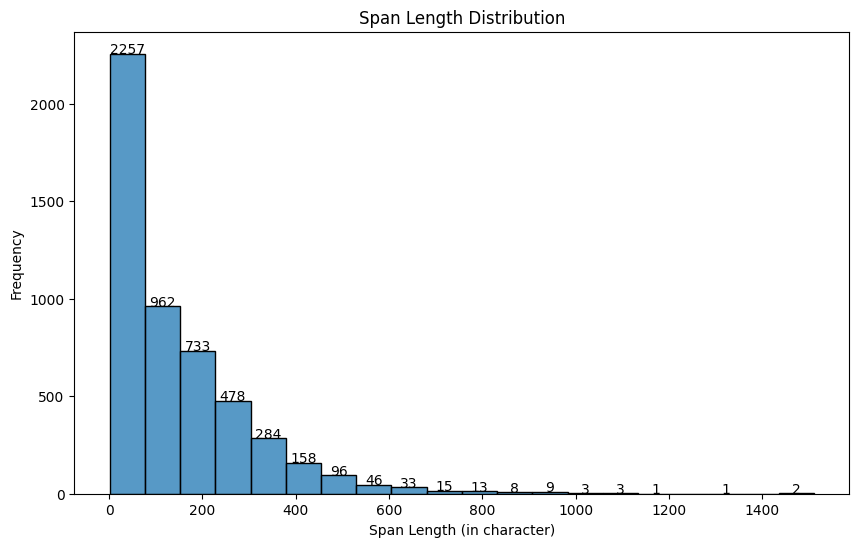

In [63]:
val_doc_df['span_lengths'] = val_doc_df['spans'].apply(span_length)
all_span_lengths = [length for sublist in val_doc_df['span_lengths'] for length in sublist]

plt.figure(figsize=(10, 6))
ax = sns.histplot(all_span_lengths, bins=20)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        ax.text(p.get_x() + p.get_width() / 2, height + 0.5, int(height), 
                ha="center", fontsize=10)

plt.title('Span Length Distribution')
plt.xlabel('Span Length (in character)')
plt.ylabel('Frequency')

plt.show()

In [64]:
val_doc_df['span_count'] = val_doc_df['spans'].apply(len)
val_doc_df['span_count'].describe()

count     61.000000
mean      83.639344
std       46.894219
min       20.000000
25%       52.000000
50%       72.000000
75%      100.000000
max      255.000000
Name: span_count, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


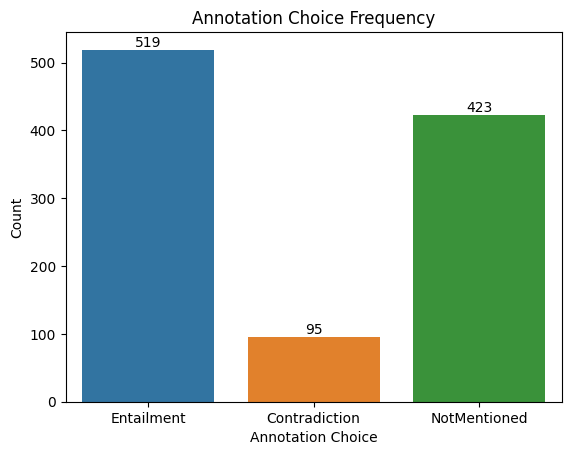

In [65]:
annotation_choices = []

for annotation_set in val_doc_df['annotation_sets']:
    for annotation_dict in annotation_set:
        for annotation, data in annotation_dict['annotations'].items():
            annotation_choices.append(data['choice'])

choice_counts = Counter(annotation_choices)

ax = sns.barplot(x=list(choice_counts.keys()), y=list(choice_counts.values()))
plt.title('Annotation Choice Frequency')
plt.xlabel('Annotation Choice')
plt.ylabel('Count')

for i, count in enumerate(choice_counts.values()):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

In [66]:
val_doc_df['annotation_count'] = val_doc_df['annotation_sets'].apply(lambda x: len(x[0]['annotations']))
val_doc_df['annotation_count'].describe()

count    61.0
mean     17.0
std       0.0
min      17.0
25%      17.0
50%      17.0
75%      17.0
max      17.0
Name: annotation_count, dtype: float64

In [67]:
print("Unique document types:", val_doc_df['document_type'].nunique())
print("Unique URLs:", val_doc_df['url'].nunique())

Unique document types: 3
Unique URLs: 61


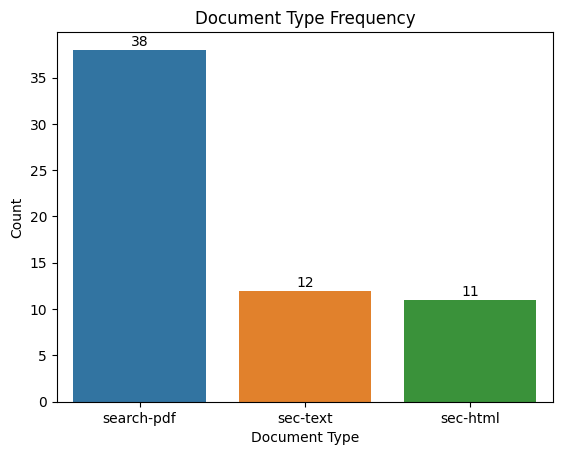

In [68]:
document_type_counts = val_doc_df['document_type'].value_counts()

ax = sns.barplot(x=document_type_counts.index, y=document_type_counts.values)
plt.title('Document Type Frequency')
plt.xlabel('Document Type')
plt.ylabel('Count')

for i, count in enumerate(document_type_counts.values):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

### EDA on Test Data

In [69]:
test_doc_df = pd.DataFrame(test['documents'])

In [70]:
test_doc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               123 non-null    int64 
 1   file_name        123 non-null    object
 2   text             123 non-null    object
 3   spans            123 non-null    object
 4   annotation_sets  123 non-null    object
 5   document_type    123 non-null    object
 6   url              123 non-null    object
dtypes: int64(1), object(6)
memory usage: 6.9+ KB


In [71]:
print(f"Null Count:- \n{test_doc_df.isnull().sum()}")

Null Count:- 
id                 0
file_name          0
text               0
spans              0
annotation_sets    0
document_type      0
url                0
dtype: int64


In [72]:
test_doc_df['word_count'], test_doc_df['word_frequency'] = zip(*test_doc_df['text'].apply(word_count))
print(test_doc_df['word_count'].describe().T)

count     123.000000
mean     1734.455285
std      1135.672764
min       217.000000
25%       935.000000
50%      1481.000000
75%      2213.000000
max      6348.000000
Name: word_count, dtype: float64


In [73]:
all_words = Counter()
test_doc_df['word_frequency'].apply(lambda x: all_words.update(x))
print(all_words.most_common(20))

[('the', 13918), ('of', 8969), ('or', 8137), ('to', 7314), ('and', 6191), ('any', 4686), ('party', 4103), ('in', 3928), ('information', 3564), ('agreement', 3246), ('by', 2824), ('this', 2805), ('a', 2712), ('shall', 2440), ('be', 2298), ('confidential', 2128), ('that', 2104), ('other', 2017), ('such', 1886), ('with', 1706)]


In [74]:
test_doc_df['text_length'] = test_doc_df['text'].apply(len)
print(f"Average text length: {test_doc_df['text_length'].mean()}")

Average text length: 11218.211382113821


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


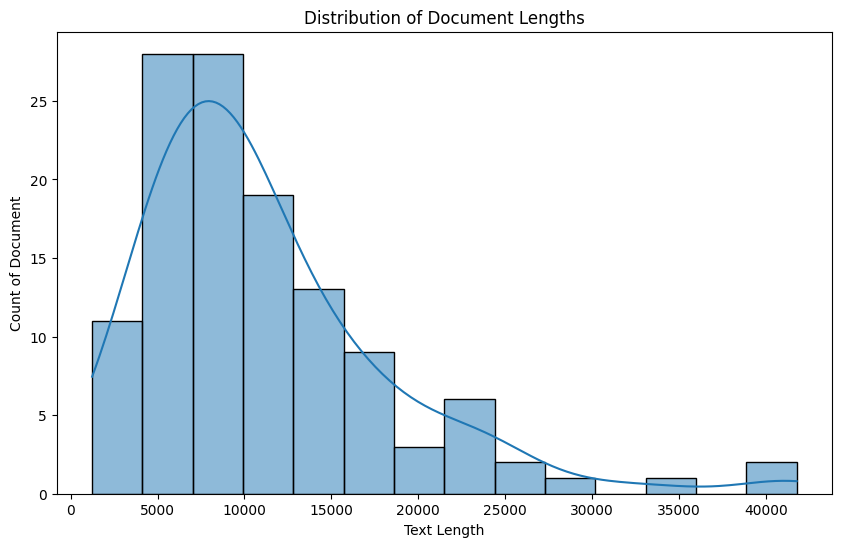

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(test_doc_df['text_length'], kde=True)
plt.title('Distribution of Document Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count of Document')
plt.show()

In [76]:
test_doc_df['file_extension'] = test_doc_df['file_name'].apply(lambda x: x.split('.')[-1])
print(test_doc_df['file_extension'].value_counts())

file_extension
pdf    76
txt    24
htm    23
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


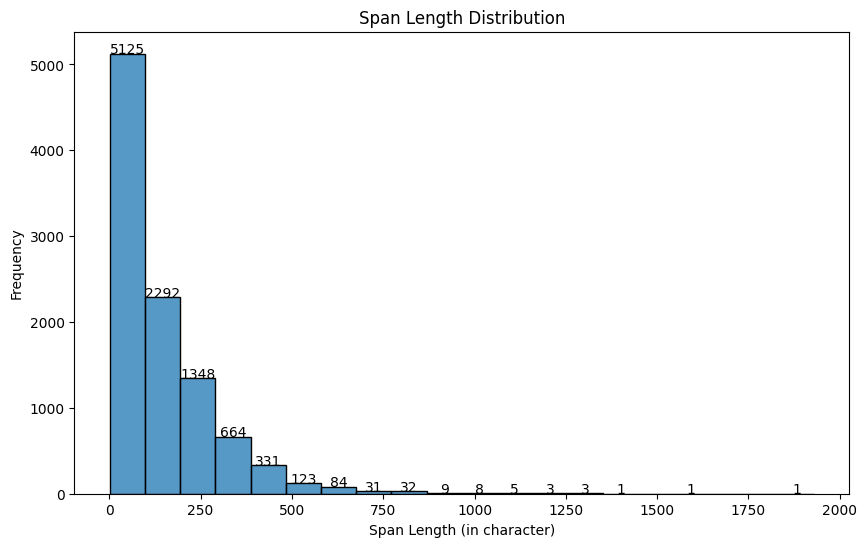

In [77]:
test_doc_df['span_lengths'] = test_doc_df['spans'].apply(span_length)
all_span_lengths = [length for sublist in test_doc_df['span_lengths'] for length in sublist]

plt.figure(figsize=(10, 6))
ax = sns.histplot(all_span_lengths, bins=20)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        ax.text(p.get_x() + p.get_width() / 2, height + 0.5, int(height), 
                ha="center", fontsize=10)

plt.title('Span Length Distribution')
plt.xlabel('Span Length (in character)')
plt.ylabel('Frequency')

plt.show()

In [78]:
test_doc_df['span_count'] = test_doc_df['spans'].apply(len)
test_doc_df['span_count'].describe()

count    123.000000
mean      81.796748
std       43.848839
min       13.000000
25%       50.500000
50%       72.000000
75%      101.000000
max      249.000000
Name: span_count, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


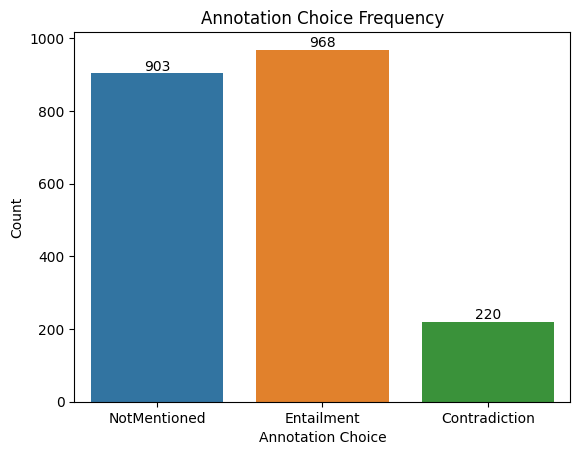

In [79]:
annotation_choices = []

for annotation_set in test_doc_df['annotation_sets']:
    for annotation_dict in annotation_set:
        for annotation, data in annotation_dict['annotations'].items():
            annotation_choices.append(data['choice'])

choice_counts = Counter(annotation_choices)

ax = sns.barplot(x=list(choice_counts.keys()), y=list(choice_counts.values()))
plt.title('Annotation Choice Frequency')
plt.xlabel('Annotation Choice')
plt.ylabel('Count')

for i, count in enumerate(choice_counts.values()):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()


In [80]:
test_doc_df['annotation_count'] = test_doc_df['annotation_sets'].apply(lambda x: len(x[0]['annotations']))
test_doc_df['annotation_count'].describe()

count    123.0
mean      17.0
std        0.0
min       17.0
25%       17.0
50%       17.0
75%       17.0
max       17.0
Name: annotation_count, dtype: float64

In [81]:
print("Unique document types:", test_doc_df['document_type'].nunique())
print("Unique URLs:", test_doc_df['url'].nunique())

Unique document types: 3
Unique URLs: 123


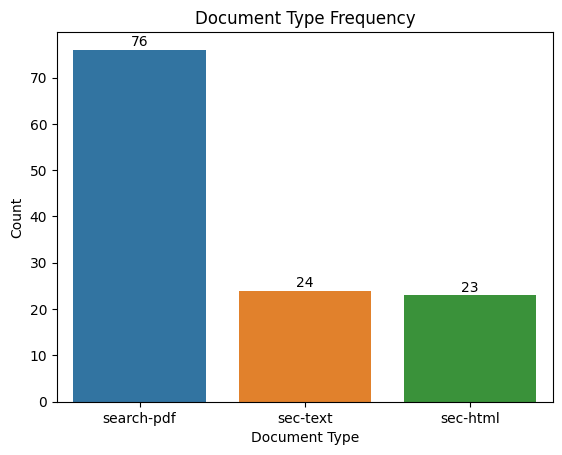

In [82]:
document_type_counts = test_doc_df['document_type'].value_counts()

ax = sns.barplot(x=document_type_counts.index, y=document_type_counts.values)
plt.title('Document Type Frequency')
plt.xlabel('Document Type')
plt.ylabel('Count')

for i, count in enumerate(document_type_counts.values):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()